In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import preprocessing_nlp as pp
import cleaning_nlp as cc
import nltk

### Naive Bayes Test on the One-Stop-English-Corpus

In [2]:
# df = pd.read_csv('data/one_stop.csv')
# df_back = df.copy()

In [3]:
data = cc.get_one_stop_dataframe(levels=False)
df_back = data.copy()

In [4]:
df = data[['documents', 'level']]

In [5]:
df_processed =  pp.preprocess_all(df, 'documents', noise=False)

In [6]:
df_processed

,documents,level,documents_clean,Lemmatized,Stemmed
0,SeaWorld's profits fell by 84% and customers a...,0,seaworld profits fell 84 customers staying awa...,seaworld profit fell 84 customer staying away ...,seaworld profit fell 84 custom stay away water...
1,The company teaches dolphins and killer whales...,0,company teaches dolphins killer whales tricks ...,company teach dolphin killer whale trick front...,compani teach dolphin killer whale trick front...
2,It says fewer people are going to its parks an...,0,says fewer people going parks profits reduced,say fewer people going park profit reduced,say fewer peopl go park profit reduc
3,SeaWorld has been in the news since the 2013 d...,0,seaworld news since 2013 documentary film blac...,seaworld news since 2013 documentary film blac...,seaworld news sinc 2013 documentari film black...
4,Animal rights organizations say that orcas kep...,0,animal rights organizations say orcas kept tan...,animal right organization say orca kept tank d...,anim right organ say orca kept tank die younge...
...,...,...,...,...,...
7390,One major problem is complicity between senior...,2,one major problem complicity senior officials ...,one major problem complicity senior official m...,one major problem complic senior offici mafia ...
7391,As the number of tigers has increased over the...,2,number tigers increased years incidents confli...,number tiger increased year incident conflict ...,number tiger increas year incid conflict villa...
7392,Wildlife authorities captured a tiger in Chitw...,2,wildlife authorities captured tiger chitwan ki...,wildlife authority captured tiger chitwan kill...,wildlif author captur tiger chitwan kill two p...
7393,"Diwakar Chapagain, who heads a World Wildlife ...",2,diwakar chapagain heads world wildlife fund ne...,diwakar chapagain head world wildlife fund nep...,diwakar chapagain head world wildlif fund nepa...


In [7]:
data = df_processed[['Lemmatized','level']]

In [8]:
documents = data.Lemmatized
target = data.level

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(documents, target, test_size=0.3, random_state=29)

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

X_train_vectors = cv.fit_transform(X_train).toarray()
X_test_vectors = cv.transform(X_test).toarray()

In [10]:
X_train_vectors.shape

(5176, 12943)

In [11]:
X_test_vectors.shape

(2219, 12943)

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y_train_labels = le.fit_transform(y_train)
y_test_labels = le.transform(y_test)

In [13]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_validate

nb = MultinomialNB()

cv_results = cross_validate(nb, X_train_vectors, y_train_labels, cv=3)
sorted(cv_results.keys())

cv_results['test_score']

array([0.30996524, 0.30202899, 0.28463768])

In [14]:
nb.fit(X_train_vectors, y_train_labels)

MultinomialNB()

In [15]:
print("Training Acc.: ", nb.score(X_train_vectors, y_train_labels))
print("Test Acc.: ", nb.score(X_test_vectors, y_test_labels))

Training Acc.:  0.785741885625966
Test Acc.:  0.2870662460567823


In [16]:
test_pred = nb.predict(X_test_vectors)

Confusion Matrix


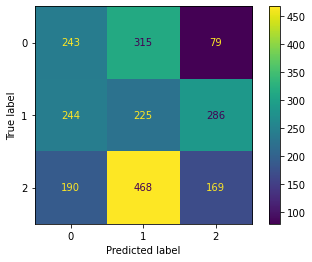

In [17]:
from sklearn import metrics

print('Confusion Matrix')

cm = metrics.confusion_matrix(y_test_labels, test_pred, labels=nb.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=nb.classes_)
disp.plot()
plt.show()

### TF IDF experiment with the One-Stop-Corpus also including the feature average number of words

In [18]:
data = df_back[['documents', 'avg_num_words', 'level']]

In [19]:
df_processed = pp.preprocess_all(data, 'documents', stop_words=False)

In [20]:
df_processed.head(2)

,documents,avg_num_words,level,documents_clean,Lemmatized,Stemmed
0,SeaWorld's profits fell by 84% and customers a...,25.0,0,profits fell by and customers are staying away...,profit fell by and customer are staying away f...,profit fell by and custom are stay away from t...
1,The company teaches dolphins and killer whales...,17.0,0,the company teaches dolphins and killer whales...,the company teach dolphin and killer whale to ...,the compani teach dolphin and killer whale to ...


In [21]:
features = ['Lemmatized', 'avg_num_words']
documents = df_processed[features]
target = df_processed['level']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(documents, target, test_size=0.2, random_state=29 )

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()

In [23]:
X_train_vectors = tfidf.fit_transform(X_train.Lemmatized).toarray()
X_test_vectors = tfidf.transform(X_test.Lemmatized).toarray()

In [24]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y_train_labels = le.fit_transform(y_train)
y_test_labels = le.transform(y_test)

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_words = scaler.fit_transform(X_train.avg_num_words.values.reshape(-1, 1))
X_test_words = scaler.transform(X_test.avg_num_words.values.reshape(-1, 1))

In [26]:
X_train_new = np.column_stack((X_train_vectors, X_train_words.reshape(-1,1)))
X_test_new = np.column_stack((X_test_vectors, X_test_words.reshape(-1,1)))

In [27]:
nb = MultinomialNB()

nb.fit(X_train_new, y_train_labels)

MultinomialNB()

In [28]:
print("Training Acc.: ", nb.score(X_train_new, y_train_labels))
print("Valid Acc.: ", nb.score(X_test_new, y_test_labels))

Training Acc.:  0.7501690331304935
Valid Acc.:  0.27856659905341447


#### One versus the Rest with TF IDF Vectorized Data

In [30]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

clf = OneVsRestClassifier(LogisticRegression(max_iter=1000)).fit(X_train_vectors, y_train_labels)

In [33]:
clf.predict(X_test_vectors)

array([1, 2, 2, ..., 2, 2, 1])

In [35]:
print("Training Acc.: ", clf.score(X_train_vectors, y_train_labels))
print("Valid Acc.: ", clf.score(X_test_vectors, y_test_labels))

Training Acc.:  0.7516903313049358
Valid Acc.:  0.4415145368492224
